# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
api_key


'dbca56d2ceb0e184de371ca468901727'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['vangaindrano',
 'yellowknife',
 'busselton',
 'kapaa',
 'hermanus',
 'rikitea',
 'cape town',
 'sarankhola',
 'ushuaia',
 'sao joao da barra',
 'arraial do cabo',
 'puerto ayora',
 'beloha',
 'nikolskoye',
 'victoria',
 'kharp',
 'nizhneyansk',
 'kaitangata',
 'tuktoyaktuk',
 'cap malheureux',
 'gat',
 'maryville',
 'seoul',
 'vao',
 'luanda',
 'albany',
 'kodiak',
 'fairbanks',
 'barrow',
 'port alfred',
 'kruisfontein',
 'avarua',
 'lunel',
 'calama',
 'taolanaro',
 'galle',
 'hobart',
 'sakakah',
 'ahipara',
 'thompson',
 'mataura',
 'aleksandrov gay',
 'punta arenas',
 'grindavik',
 'provideniya',
 'lagoa',
 'bluff',
 'tasiilaq',
 'hovd',
 'mar del plata',
 'saint-joseph',
 'komsomolskiy',
 'bredasdorp',
 'maturin',
 'ardmore',
 'vaini',
 'sinkat',
 'kovdor',
 'saint-philippe',
 'ojinaga',
 'atuona',
 'rodrigues alves',
 'castro',
 'bang saphan',
 'nishihara',
 'norman wells',
 'georgetown',
 'umzimvubu',
 'fortuna',
 'novikovo',
 'samusu',
 'north bend',
 'samalaeulu',
 'iluliss

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).
url = "http://api.openweathermap.org/data/2.5/weather?"

In [60]:
url = "http://api.openweathermap.org/data/2.5/weather?"
weather_data=[]
for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city+ "&units=imperial"
    weather_response = requests.get(query_url)
    print(query_url)
    weather_json = weather_response.json()
    print(weather_json)
    try:
            weather_data.append({
           "City":city,
           "Cloudiness": weather_json["clouds"]["all"],
           "Country":weather_json["sys"]["country"],
           "Date":weather_json["dt"],
           "Humidity":weather_json["main"]["humidity"],
           "Lat":weather_json["coord"]["lat"],
           "Lng":weather_json["coord"]["lon"],
           "Max Temp":weather_json["main"]["temp_max"],
           "Wind Speed":weather_json["wind"]["speed"]})
    except Exception as e:
           print("error type: {}. error value: {}".format(type(e), e))

pd.DataFrame.from_dict(weather_data)

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=vangaindrano&units=imperial
{'coord': {'lon': 47.6, 'lat': -23.35}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 73.66, 'pressure': 1013.84, 'humidity': 90, 'temp_min': 73.66, 'temp_max': 73.66, 'sea_level': 1013.84, 'grnd_level': 990.16}, 'wind': {'speed': 3.96, 'deg': 287.5}, 'rain': {'3h': 0.19}, 'clouds': {'all': 88}, 'dt': 1551650057, 'sys': {'message': 0.0033, 'country': 'MG', 'sunrise': 1551581178, 'sunset': 1551626168}, 'id': 1054329, 'name': 'Vangaindrano', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=yellowknife&units=imperial
{'coord': {'lon': -114.38, 'lat': 62.45}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 10.2, 'pressure': 1035, 'humidity': 39, 'temp_min': 10, 'temp_max': 1

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=victoria&units=imperial
{'coord': {'lon': 115.24, 'lat': 5.28}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.01, 'pressure': 1009, 'humidity': 100, 'temp_min': 77, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 3.74, 'deg': 349}, 'clouds': {'all': 75}, 'dt': 1551646800, 'sys': {'type': 1, 'id': 9372, 'message': 0.0045, 'country': 'BN', 'sunrise': 1551565803, 'sunset': 1551609107}, 'id': 1733782, 'name': 'Victoria', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=kharp&units=imperial
{'coord': {'lon': 65.8, 'lat': 66.82}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -3.83, 'pressure': 998.12, 'humidity': 63, 'temp_min': -3.83, 'temp_max': -3.83, 'sea_level': 998.12, 'grnd_

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=barrow&units=imperial
{'coord': {'lon': -60.23, 'lat': -38.31}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 79.38, 'pressure': 1009, 'humidity': 40, 'temp_min': 79.38, 'temp_max': 79.38, 'sea_level': 1009, 'grnd_level': 997.36}, 'wind': {'speed': 14.03, 'deg': 348.5}, 'clouds': {'all': 44}, 'dt': 1551650067, 'sys': {'message': 0.0031, 'country': 'AR', 'sunrise': 1551606463, 'sunset': 1551652615}, 'id': 3833859, 'name': 'Barrow', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=port alfred&units=imperial
{'coord': {'lon': 26.89, 'lat': -33.59}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 67.55, 'pressure': 1010, 'humidity': 90, 'temp_min': 66.99, 'temp_max': 68}, 'wind': {'speed': 13.47,

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=grindavik&units=imperial
{'coord': {'lon': -22.43, 'lat': 63.84}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 38.3, 'pressure': 992, 'humidity': 74, 'temp_min': 37.4, 'temp_max': 39.99}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 30}, 'clouds': {'all': 0}, 'dt': 1551650055, 'sys': {'type': 1, 'id': 90, 'message': 0.0042, 'country': 'IS', 'sunrise': 1551601659, 'sunset': 1551639402}, 'id': 3416888, 'name': 'Grindavik', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=provideniya&units=imperial
{'coord': {'lon': -173.23, 'lat': 64.42}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.2, 'pressure': 1017, 'humidity': 92, 'temp_min': 30.2, 'temp_max': 30.2}, 'wind': {'speed': 29.08, 

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=kovdor&units=imperial
{'coord': {'lon': 30.47, 'lat': 67.56}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 0.81, 'pressure': 996.28, 'humidity': 69, 'temp_min': 0.81, 'temp_max': 0.81, 'sea_level': 996.28, 'grnd_level': 968.88}, 'wind': {'speed': 4.85, 'deg': 222}, 'clouds': {'all': 24}, 'dt': 1551650198, 'sys': {'message': 0.0033, 'country': 'RU', 'sunrise': 1551589548, 'sunset': 1551626140}, 'id': 543508, 'name': 'Kovdor', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=saint-philippe&units=imperial
{'coord': {'lon': -73.48, 'lat': 45.36}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 29.64, 'pressure': 1016, 'humidity': 63, 'temp_min': 28, 'temp_max': 30.99}, 'visibility': 14484, 'wind': {

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=samalaeulu&units=imperial
{'cod': '404', 'message': 'city not found'}
error type: <class 'KeyError'>. error value: 'clouds'
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=ilulissat&units=imperial
{'coord': {'lon': -51.1, 'lat': 69.22}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 19.4, 'pressure': 1008, 'humidity': 79, 'temp_min': 19.4, 'temp_max': 19.4}, 'wind': {'speed': 4.7, 'deg': 40}, 'clouds': {'all': 76}, 'dt': 1551646200, 'sys': {'type': 1, 'id': 165, 'message': 0.0056, 'country': 'GL', 'sunrise': 1551609373, 'sunset': 1551645470}, 'id': 3423146, 'name': 'Ilulissat', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=pevek&units=imperial
{'coord': {'lon': 170.27, 'lat': 69.7}, 'weather': [{'id': 803, 'main': 'Clouds', 'de

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=agramonte&units=imperial
{'coord': {'lon': -81.12, 'lat': 22.68}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 84.2, 'pressure': 1013, 'humidity': 58, 'temp_min': 84.2, 'temp_max': 84.2}, 'visibility': 9000, 'wind': {'speed': 11.41, 'deg': 40}, 'clouds': {'all': 40}, 'dt': 1551646200, 'sys': {'type': 1, 'id': 7254, 'message': 0.0036, 'country': 'CU', 'sunrise': 1551613410, 'sunset': 1551655753}, 'id': 3556437, 'name': 'Agramonte', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=pisco&units=imperial
{'coord': {'lon': -76.2, 'lat': -13.71}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 71.6, 'pressure': 1008, 'humidity': 30, 'temp_min': 71.6, 'temp_max': 71.6}, 'visibility': 10000, 

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=tiksi&units=imperial
{'coord': {'lon': 128.87, 'lat': 71.64}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -5.95, 'pressure': 1013.56, 'humidity': 70, 'temp_min': -5.95, 'temp_max': -5.95, 'sea_level': 1013.56, 'grnd_level': 994.72}, 'wind': {'speed': 8.66, 'deg': 231.5}, 'clouds': {'all': 56}, 'dt': 1551650144, 'sys': {'message': 0.0042, 'country': 'RU', 'sunrise': 1551566873, 'sunset': 1551601610}, 'id': 2015306, 'name': 'Tiksi', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=barentsburg&units=imperial
{'cod': '404', 'message': 'city not found'}
error type: <class 'KeyError'>. error value: 'clouds'
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=pasighat&units=imperial
{'coord': {'lon': 95.33, 'lat': 28.06}, 'weather': [{'id

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=mogadishu&units=imperial
{'coord': {'lon': 45.34, 'lat': 2.04}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 79.38, 'pressure': 1010.24, 'humidity': 100, 'temp_min': 79.38, 'temp_max': 79.38, 'sea_level': 1010.24, 'grnd_level': 1010.24}, 'wind': {'speed': 11.9, 'deg': 104.5}, 'clouds': {'all': 36}, 'dt': 1551650060, 'sys': {'message': 0.0046, 'country': 'SO', 'sunrise': 1551582485, 'sunset': 1551625969}, 'id': 53654, 'name': 'Mogadishu', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=aras&units=imperial
{'coord': {'lon': 44.38, 'lat': 14.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 46.12, 'pressure': 1013.72, 'humidity': 87, 'temp_min': 46.12, 'temp_max': 46.12, 'sea_level': 1013.7

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=faanui&units=imperial
{'coord': {'lon': -151.75, 'lat': -16.48}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 83.34, 'pressure': 1012.88, 'humidity': 100, 'temp_min': 83.34, 'temp_max': 83.34, 'sea_level': 1012.88, 'grnd_level': 1012.72}, 'wind': {'speed': 5.64, 'deg': 106.5}, 'clouds': {'all': 20}, 'dt': 1551650059, 'sys': {'message': 0.0043, 'country': 'PF', 'sunrise': 1551629257, 'sunset': 1551673770}, 'id': 4034551, 'name': 'Faanui', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=port keats&units=imperial
{'coord': {'lon': 129.55, 'lat': -14.25}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 80.86, 'pressure': 1009.04, 'humidity': 89, 'temp_min': 80.86, 'temp_max': 80.86, 'sea_level': 1009

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=lashio&units=imperial
{'coord': {'lon': 97.75, 'lat': 22.93}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 53.23, 'pressure': 1007.6, 'humidity': 85, 'temp_min': 53.23, 'temp_max': 53.23, 'sea_level': 1007.6, 'grnd_level': 914.88}, 'wind': {'speed': 1.16, 'deg': 349.5}, 'clouds': {'all': 32}, 'dt': 1551650019, 'sys': {'message': 0.0046, 'country': 'MM', 'sunrise': 1551570515, 'sunset': 1551612804}, 'id': 1314759, 'name': 'Lashio', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=asau&units=imperial
{'cod': '404', 'message': 'city not found'}
error type: <class 'KeyError'>. error value: 'clouds'
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=carnarvon&units=imperial
{'coord': {'lon': 22.13, 'lat': -30.97}, 'weather': [{'id': 

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=christchurch&units=imperial
{'coord': {'lon': 172.64, 'lat': -43.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 61.95, 'pressure': 1023, 'humidity': 82, 'temp_min': 60.8, 'temp_max': 64}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 70}, 'clouds': {'all': 0}, 'dt': 1551649985, 'sys': {'type': 1, 'id': 7348, 'message': 0.0045, 'country': 'NZ', 'sunrise': 1551550251, 'sunset': 1551597058}, 'id': 2192362, 'name': 'Christchurch', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=puerto escondido&units=imperial
{'coord': {'lon': -97.07, 'lat': 15.86}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 84.2, 'pressure': 1013, 'humidity': 70, 'temp_min': 84.2, 'temp_max': 84.2}, 'visibility': 1609

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=florianopolis&units=imperial
{'coord': {'lon': -48.55, 'lat': -27.6}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 80.33, 'pressure': 1014, 'humidity': 78, 'temp_min': 78.8, 'temp_max': 81}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 160}, 'clouds': {'all': 40}, 'dt': 1551650286, 'sys': {'type': 1, 'id': 8360, 'message': 0.0041, 'country': 'BR', 'sunrise': 1551604110, 'sunset': 1551649377}, 'id': 3463237, 'name': 'Florianopolis', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=port-cartier&units=imperial
{'coord': {'lon': -66.88, 'lat': 50.03}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 21.07, 'pressure': 1015, 'humidity': 48, 'temp_min': 21, 'temp_max': 21.2}, 'visibility'

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=mata&units=imperial
{'coord': {'lon': -79.93, 'lat': 22.63}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 86, 'pressure': 1013, 'humidity': 42, 'temp_min': 86, 'temp_max': 86}, 'visibility': 9000, 'wind': {'speed': 9.17, 'deg': 70}, 'clouds': {'all': 40}, 'dt': 1551646260, 'sys': {'type': 1, 'id': 7252, 'message': 0.004, 'country': 'CU', 'sunrise': 1551613123, 'sunset': 1551655469}, 'id': 3564114, 'name': 'Mata', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=olafsvik&units=imperial
{'cod': '404', 'message': 'city not found'}
error type: <class 'KeyError'>. error value: 'clouds'
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=thai binh&units=imperial
{'coord': {'lon': 106.33, 'lat': 20.45}, 'weather': [{'id': 801, 'main': '

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=botngard&units=imperial
{'coord': {'lon': 9.81, 'lat': 63.77}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 30.45, 'pressure': 986, 'humidity': 74, 'temp_min': 28, 'temp_max': 33.8}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 100}, 'clouds': {'all': 75}, 'dt': 1551650164, 'sys': {'type': 1, 'id': 1647, 'message': 0.0039, 'country': 'NO', 'sunrise': 1551593931, 'sunset': 1551631658}, 'id': 3160491, 'name': 'Botngard', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=yerbogachen&units=imperial
{'coord': {'lon': 108.01, 'lat': 61.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 4.45, 'pressure': 1024, 'humidity': 68, 'temp_min': 4.45, 'temp_max': 4.45, 'sea_level': 1024, 'grnd_level'

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=lao cai&units=imperial
{'coord': {'lon': 103.95, 'lat': 22.48}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 60.84, 'pressure': 1008.44, 'humidity': 85, 'temp_min': 60.84, 'temp_max': 60.84, 'sea_level': 1008.44, 'grnd_level': 887.6}, 'wind': {'speed': 1.16, 'deg': 90.0003}, 'rain': {'3h': 0.2}, 'clouds': {'all': 80}, 'dt': 1551650457, 'sys': {'message': 0.0039, 'country': 'VN', 'sunrise': 1551569013, 'sunset': 1551611329}, 'id': 1576303, 'name': 'Lao Cai', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=nenjiang&units=imperial
{'coord': {'lon': 125.23, 'lat': 49.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 15.25, 'pressure': 1015.8, 'humidity': 62, 'temp_min': 15.25, 'temp_max': 15.25, 'se

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=mount pleasant&units=imperial
{'coord': {'lon': -94.97, 'lat': 33.16}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 36.3, 'pressure': 1022, 'humidity': 74, 'temp_min': 32, 'temp_max': 39.99}, 'visibility': 16093, 'wind': {'speed': 16.11, 'deg': 330, 'gust': 9.8}, 'clouds': {'all': 90}, 'dt': 1551649639, 'sys': {'type': 1, 'id': 5235, 'message': 0.006, 'country': 'US', 'sunrise': 1551617076, 'sunset': 1551658744}, 'id': 4712933, 'name': 'Mount Pleasant', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=klaksvik&units=imperial
{'coord': {'lon': -6.59, 'lat': 62.23}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 42.8, 'pressure': 978, 'humidity': 81, 'temp_min': 42.8, 'temp_max': 42.8}, 'wind'

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=novo aripuana&units=imperial
{'coord': {'lon': -60.38, 'lat': -5.12}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 87.66, 'pressure': 1006.72, 'humidity': 67, 'temp_min': 87.66, 'temp_max': 87.66, 'sea_level': 1006.72, 'grnd_level': 1000.72}, 'wind': {'speed': 1.72, 'deg': 19.0003}, 'clouds': {'all': 20}, 'dt': 1551650532, 'sys': {'message': 0.0037, 'country': 'BR', 'sunrise': 1551607656, 'sunset': 1551651530}, 'id': 3663142, 'name': 'Novo Aripuana', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=mys shmidta&units=imperial
{'cod': '404', 'message': 'city not found'}
error type: <class 'KeyError'>. error value: 'clouds'
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=tautira&units=imperial
{'coord': {'lon': -149.15, 'lat': -17.73}

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=laguna&units=imperial
{'coord': {'lon': -110.01, 'lat': 27.52}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 87.8, 'pressure': 1010, 'humidity': 22, 'temp_min': 87.8, 'temp_max': 87.8}, 'visibility': 19312, 'wind': {'speed': 14.99, 'deg': 260}, 'clouds': {'all': 5}, 'dt': 1551649200, 'sys': {'type': 1, 'id': 7104, 'message': 0.0031, 'country': 'MX', 'sunrise': 1551620490, 'sunset': 1551662542}, 'id': 4013704, 'name': 'Laguna', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=bonthe&units=imperial
{'coord': {'lon': -12.5, 'lat': 7.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 81.94, 'pressure': 1012.16, 'humidity': 59, 'temp_min': 81.94, 'temp_max': 81.94, 'sea_level': 1012.16, 'grnd_level': 1

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=mareeba&units=imperial
{'coord': {'lon': 145.42, 'lat': -16.99}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 74.44, 'pressure': 1012, 'humidity': 83, 'temp_min': 69.01, 'temp_max': 79}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 160}, 'clouds': {'all': 75}, 'dt': 1551650418, 'sys': {'type': 1, 'id': 9490, 'message': 0.0041, 'country': 'AU', 'sunrise': 1551557908, 'sunset': 1551602499}, 'id': 2158767, 'name': 'Mareeba', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=karratha&units=imperial
{'coord': {'lon': 116.85, 'lat': -20.74}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.95, 'pressure': 1011.28, 'humidity': 49, 'temp_min': 80.95, 'temp_max': 80.95, 'sea_lev

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=andros town&units=imperial
{'coord': {'lon': -77.79, 'lat': 24.73}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 78.4, 'pressure': 1015, 'humidity': 74, 'temp_min': 78.01, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 170}, 'clouds': {'all': 40}, 'dt': 1551650413, 'sys': {'type': 1, 'id': 7269, 'message': 0.0038, 'country': 'BS', 'sunrise': 1551612674, 'sunset': 1551654892}, 'id': 3572906, 'name': 'Andros Town', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=nemuro&units=imperial
{'coord': {'lon': 145.57, 'lat': 43.32}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 32.62, 'pressure': 1012.52, 'humidity': 90, 'temp_min': 32.62, 'temp_max': 32.62, 'sea_level': 101

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=benguela&units=imperial
{'coord': {'lon': 13.4, 'lat': -12.58}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.6, 'pressure': 1012, 'humidity': 100, 'temp_min': 79.6, 'temp_max': 79.6, 'sea_level': 1012, 'grnd_level': 1004}, 'wind': {'speed': 6.31, 'deg': 231.5}, 'clouds': {'all': 64}, 'dt': 1551650639, 'sys': {'message': 0.0044, 'country': 'AO', 'sunrise': 1551589733, 'sunset': 1551634037}, 'id': 3351663, 'name': 'Benguela', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=antofagasta&units=imperial
{'coord': {'lon': -70.4, 'lat': -23.65}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 71.6, 'pressure': 1012, 'humidity': 64, 'temp_min': 71.6, 'temp_max': 71.6}, 'visibility': 10000, 'wind':

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=umm lajj&units=imperial
{'coord': {'lon': 37.27, 'lat': 25.02}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 56.16, 'pressure': 1017.56, 'humidity': 100, 'temp_min': 56.16, 'temp_max': 56.16, 'sea_level': 1017.56, 'grnd_level': 1004.4}, 'wind': {'speed': 4.63, 'deg': 23.0003}, 'clouds': {'all': 0}, 'dt': 1551650647, 'sys': {'message': 0.0142, 'country': 'SA', 'sunrise': 1551585087, 'sunset': 1551627259}, 'id': 100926, 'name': 'Umm Lajj', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=mandera&units=imperial
{'coord': {'lon': 41.86, 'lat': 3.94}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 80.01, 'pressure': 1013, 'humidity': 13, 'temp_min': 80.01, 'temp_max': 80.01}, 'wind': {'speed': 1

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=vila velha&units=imperial
{'coord': {'lon': -38.6, 'lat': -3.71}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 81.25, 'pressure': 1012, 'humidity': 78, 'temp_min': 80.6, 'temp_max': 82}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 10}, 'clouds': {'all': 40}, 'dt': 1551650400, 'sys': {'type': 1, 'id': 8363, 'message': 0.0037, 'country': 'BR', 'sunrise': 1551602468, 'sunset': 1551646266}, 'id': 6320062, 'name': 'Vila Velha', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=belyy yar&units=imperial
{'coord': {'lon': 91.39, 'lat': 53.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.4, 'pressure': 1018, 'humidity': 92, 'temp_min': 28.4, 'temp_max': 28.4}, 'visibility': 7000, '

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=wajir&units=imperial
{'coord': {'lon': 40.07, 'lat': 1.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 82.08, 'pressure': 1007.88, 'humidity': 46, 'temp_min': 82.08, 'temp_max': 82.08, 'sea_level': 1007.88, 'grnd_level': 977.36}, 'wind': {'speed': 7.76, 'deg': 121.5}, 'clouds': {'all': 0}, 'dt': 1551650659, 'sys': {'message': 0.0034, 'country': 'KE', 'sunrise': 1551583741, 'sunset': 1551627241}, 'id': 178443, 'name': 'Wajir', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=inhambane&units=imperial
{'coord': {'lon': 35.38, 'lat': -23.87}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.32, 'pressure': 1013, 'humidity': 92, 'temp_min': 80.32, 'temp_max': 80.32, 'sea_level': 1013, 'grnd_leve

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=sitka&units=imperial
{'coord': {'lon': -99.65, 'lat': 37.17}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 10.99, 'pressure': 1035, 'humidity': 75, 'temp_min': 10.99, 'temp_max': 10.99}, 'wind': {'speed': 10, 'deg': 343, 'gust': 6.71}, 'snow': {'3h': 0.013999999999999}, 'clouds': {'all': 68}, 'dt': 1551650524, 'sys': {'type': 3, 'id': 2005167, 'message': 0.0033, 'country': 'US', 'sunrise': 1551618350, 'sunset': 1551659721}, 'id': 4267710, 'name': 'Sitka', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=high prairie&units=imperial
{'coord': {'lon': -116.48, 'lat': 55.43}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 4.81, 'pressure': 1042.68, 'humidity': 48, 'temp_min': 4.81, 'temp_max': 4.8

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=saint-augustin&units=imperial
{'coord': {'lon': -0.61, 'lat': 44.83}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 63.09, 'pressure': 1008, 'humidity': 44, 'temp_min': 61, 'temp_max': 66.2}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 190}, 'clouds': {'all': 0}, 'dt': 1551650589, 'sys': {'type': 1, 'id': 6450, 'message': 0.0041, 'country': 'FR', 'sunrise': 1551594946, 'sunset': 1551635603}, 'id': 3031582, 'name': 'Saint-Augustin', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=altamira&units=imperial
{'coord': {'lon': -52.21, 'lat': -3.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 84.2, 'pressure': 1009, 'humidity': 79, 'temp_min': 84.2, 'temp_max': 84.2}, 'visibility': 1000

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=zhigansk&units=imperial
{'coord': {'lon': 123.37, 'lat': 66.77}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -2.8, 'pressure': 1018.28, 'humidity': 73, 'temp_min': -2.8, 'temp_max': -2.8, 'sea_level': 1018.28, 'grnd_level': 1009.36}, 'wind': {'speed': 6.64, 'deg': 155}, 'clouds': {'all': 68}, 'dt': 1551650683, 'sys': {'message': 0.0031, 'country': 'RU', 'sunrise': 1551567179, 'sunset': 1551603919}, 'id': 2012530, 'name': 'Zhigansk', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=junnar&units=imperial
{'coord': {'lon': 73.88, 'lat': 19.21}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 52.74, 'pressure': 1010.68, 'humidity': 91, 'temp_min': 52.74, 'temp_max': 52.74, 'sea_level': 1010.68, 'g

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=sabha&units=imperial
{'coord': {'lon': 14.43, 'lat': 27.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 53.19, 'pressure': 1021.68, 'humidity': 48, 'temp_min': 53.19, 'temp_max': 53.19, 'sea_level': 1021.68, 'grnd_level': 969.6}, 'wind': {'speed': 5.97, 'deg': 276.5}, 'clouds': {'all': 0}, 'dt': 1551650691, 'sys': {'message': 0.0038, 'country': 'LY', 'sunrise': 1551590630, 'sunset': 1551632680}, 'id': 2212775, 'name': 'Sabha', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=kieta&units=imperial
{'coord': {'lon': 155.63, 'lat': -6.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 78.84, 'pressure': 1008.72, 'humidity': 100, 'temp_min': 78.84, 'temp_max': 78.84, 'sea_level': 1008.72, 'grnd_lev

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=saint-andre-avellin&units=imperial
{'coord': {'lon': -75.07, 'lat': 45.72}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.85, 'pressure': 1015, 'humidity': 58, 'temp_min': 28, 'temp_max': 30.2}, 'visibility': 24140, 'wind': {'speed': 6.93, 'deg': 180}, 'clouds': {'all': 90}, 'dt': 1551650641, 'sys': {'type': 1, 'id': 851, 'message': 0.0041, 'country': 'CA', 'sunrise': 1551612839, 'sunset': 1551653447}, 'id': 6137404, 'name': 'Saint-Andre-Avellin', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=zyryanka&units=imperial
{'coord': {'lon': 150.89, 'lat': 65.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -20.66, 'pressure': 1019.68, 'humidity': 59, 'temp_min': -20.66, 'temp_max': -20.66, 

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=neryungri&units=imperial
{'coord': {'lon': 124.71, 'lat': 56.66}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -6.53, 'pressure': 1021.76, 'humidity': 52, 'temp_min': -6.53, 'temp_max': -6.53, 'sea_level': 1021.76, 'grnd_level': 899.04}, 'wind': {'speed': 4.85, 'deg': 311.5}, 'clouds': {'all': 0}, 'dt': 1551650714, 'sys': {'message': 0.0046, 'country': 'RU', 'sunrise': 1551565677, 'sunset': 1551604748}, 'id': 2019309, 'name': 'Neryungri', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=lichuan&units=imperial
{'coord': {'lon': 108.94, 'lat': 30.3}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 26.73, 'pressure': 1014.2, 'humidity': 78, 'temp_min': 26.73, 'temp_max': 26.73, 'sea_level': 101

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=usinsk&units=imperial
{'coord': {'lon': 57.56, 'lat': 66}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -7.25, 'pressure': 998.56, 'humidity': 59, 'temp_min': -7.25, 'temp_max': -7.25, 'sea_level': 998.56, 'grnd_level': 988.48}, 'wind': {'speed': 9.1, 'deg': 20.0003}, 'clouds': {'all': 8}, 'dt': 1551650722, 'sys': {'message': 0.0033, 'country': 'RU', 'sunrise': 1551582810, 'sunset': 1551619870}, 'id': 863061, 'name': 'Usinsk', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=tubruq&units=imperial
{'cod': '404', 'message': 'city not found'}
error type: <class 'KeyError'>. error value: 'clouds'
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=chilca&units=imperial
{'coord': {'lon': -72.34, 'lat': -13.22}, 'weather': [{'id': 802, 'main':

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=talnakh&units=imperial
{'coord': {'lon': 88.39, 'lat': 69.49}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -10.58, 'pressure': 1012.48, 'humidity': 52, 'temp_min': -10.58, 'temp_max': -10.58, 'sea_level': 1012.48, 'grnd_level': 989.84}, 'wind': {'speed': 3.4, 'deg': 90.5003}, 'clouds': {'all': 8}, 'dt': 1551650735, 'sys': {'message': 0.0042, 'country': 'RU', 'sunrise': 1551576052, 'sunset': 1551611846}, 'id': 1490256, 'name': 'Talnakh', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=shingu&units=imperial
{'coord': {'lon': 135.99, 'lat': 33.72}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 55.75, 'pressure': 1003.8, 'humidity': 100, 'temp_min': 55.75, 'temp_max': 55.75, 'sea_level': 1003.8, 

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=kahului&units=imperial
{'coord': {'lon': -156.47, 'lat': 20.89}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 74.25, 'pressure': 1023, 'humidity': 41, 'temp_min': 70, 'temp_max': 78.8}, 'visibility': 16093, 'wind': {'speed': 14.99, 'deg': 40}, 'clouds': {'all': 20}, 'dt': 1551650456, 'sys': {'type': 1, 'id': 7879, 'message': 0.005, 'country': 'US', 'sunrise': 1551631430, 'sunset': 1551673894}, 'id': 5847411, 'name': 'Kahului', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=belushya guba&units=imperial
{'cod': '404', 'message': 'city not found'}
error type: <class 'KeyError'>. error value: 'clouds'
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=bilma&units=imperial
{'coord': {'lon': 12.92, 'lat': 18.69}, 'weather': [{'id': 800, '

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=sangin&units=imperial
{'coord': {'lon': 64.85, 'lat': 32.07}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 42.88, 'pressure': 1015.28, 'humidity': 90, 'temp_min': 42.88, 'temp_max': 42.88, 'sea_level': 1015.28, 'grnd_level': 903.6}, 'wind': {'speed': 5.3, 'deg': 53.5003}, 'clouds': {'all': 20}, 'dt': 1551650751, 'sys': {'message': 0.0038, 'country': 'AF', 'sunrise': 1551578712, 'sunset': 1551620405}, 'id': 1127547, 'name': 'Sangin', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=filadelfia&units=imperial
{'coord': {'lon': -60.04, 'lat': -22.35}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 95.58, 'pressure': 1004.88, 'humidity': 43, 'temp_min': 95.58, 'temp_max': 95.58, 'sea_level': 1004.88, 

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=eskasem&units=imperial
{'cod': '404', 'message': 'city not found'}
error type: <class 'KeyError'>. error value: 'clouds'
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=guanica&units=imperial
{'coord': {'lon': -66.91, 'lat': 17.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.53, 'pressure': 1016, 'humidity': 87, 'temp_min': 75.99, 'temp_max': 80.01}, 'visibility': 16093, 'wind': {'speed': 10.29, 'deg': 80}, 'clouds': {'all': 90}, 'dt': 1551650529, 'sys': {'type': 1, 'id': 8768, 'message': 0.0044, 'country': 'PR', 'sunrise': 1551609861, 'sunset': 1551652477}, 'id': 4565090, 'name': 'Guanica', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=attawapiskat&units=imperial
{'cod': '404', 'message': 'city not found'}
error type:

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=bandhi&units=imperial
{'coord': {'lon': 68.3, 'lat': 26.59}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 57.2, 'pressure': 1013, 'humidity': 87, 'temp_min': 57.2, 'temp_max': 57.2}, 'visibility': 3000, 'wind': {'speed': 4.7, 'deg': 315}, 'clouds': {'all': 0}, 'dt': 1551650400, 'sys': {'type': 1, 'id': 7587, 'message': 0.0032, 'country': 'PK', 'sunrise': 1551577696, 'sunset': 1551619760}, 'id': 1183511, 'name': 'Bandhi', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=palaia fokaia&units=imperial
{'coord': {'lon': 23.95, 'lat': 37.72}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 48.04, 'pressure': 1019, 'humidity': 75, 'temp_min': 41, 'temp_max': 51.01}, 'visibility': 10000, 'wind': {'speed': 2.24}

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=okhotsk&units=imperial
{'coord': {'lon': 143.24, 'lat': 59.36}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -7.7, 'pressure': 1008.92, 'humidity': 100, 'temp_min': -7.7, 'temp_max': -7.7, 'sea_level': 1008.92, 'grnd_level': 1001.76}, 'wind': {'speed': 6.64, 'deg': 338}, 'clouds': {'all': 0}, 'dt': 1551650783, 'sys': {'message': 0.004, 'country': 'RU', 'sunrise': 1551561484, 'sunset': 1551600055}, 'id': 2122605, 'name': 'Okhotsk', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=bad worishofen&units=imperial
{'coord': {'lon': 10.6, 'lat': 48.02}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 46.42, 'pressure': 1010, 'humidity': 64, 'temp_min': 39.99, 'temp_max': 50}, 'visibility': 10000, '

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=margate&units=imperial
{'coord': {'lon': 147.26, 'lat': -43.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59.99, 'pressure': 1017, 'humidity': 62, 'temp_min': 55.99, 'temp_max': 64.99}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 350}, 'clouds': {'all': 0}, 'dt': 1551650775, 'sys': {'type': 1, 'id': 9545, 'message': 0.004, 'country': 'AU', 'sunrise': 1551556377, 'sunset': 1551603113}, 'id': 2158744, 'name': 'Margate', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=maryborough&units=imperial
{'coord': {'lon': 152.7, 'lat': -25.54}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 69.25, 'pressure': 1018.12, 'humidity': 88, 'temp_min': 69.25, 'temp_max': 69.25, 'sea_level': 1018.12, 'grnd

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=fayaoue&units=imperial
{'coord': {'lon': 166.53, 'lat': -20.65}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.96, 'pressure': 1013.16, 'humidity': 98, 'temp_min': 79.96, 'temp_max': 79.96, 'sea_level': 1013.16, 'grnd_level': 1013.12}, 'wind': {'speed': 13.24, 'deg': 48.5003}, 'clouds': {'all': 68}, 'dt': 1551650794, 'sys': {'message': 0.0037, 'country': 'NC', 'sunrise': 1551552719, 'sunset': 1551597552}, 'id': 2141305, 'name': 'Fayaoue', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=biak&units=imperial
{'coord': {'lon': 122.88, 'lat': -0.91}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 77.08, 'pressure': 1008.48, 'humidity': 99, 'temp_min': 77.08, 'temp_max': 77.08, 'sea_level': 1008.

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=atar&units=imperial
{'coord': {'lon': -13.05, 'lat': 20.52}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 65.38, 'pressure': 1017.88, 'humidity': 16, 'temp_min': 65.38, 'temp_max': 65.38, 'sea_level': 1017.88, 'grnd_level': 987.84}, 'wind': {'speed': 7.09, 'deg': 37.0003}, 'clouds': {'all': 0}, 'dt': 1551650798, 'sys': {'message': 0.0047, 'country': 'MR', 'sunrise': 1551597017, 'sunset': 1551639475}, 'id': 2381334, 'name': 'Atar', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=statesboro&units=imperial
{'coord': {'lon': -81.78, 'lat': 32.45}, 'weather': [{'id': 211, 'main': 'Thunderstorm', 'description': 'thunderstorm', 'icon': '11d'}, {'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 73.98, 'pressure': 1007, '

http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=port hardy&units=imperial
{'coord': {'lon': -127.42, 'lat': 50.7}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 33.8, 'pressure': 1025, 'humidity': 80, 'temp_min': 33.8, 'temp_max': 33.8}, 'visibility': 9656, 'wind': {'speed': 23.04, 'deg': 100, 'gust': 14.4}, 'clouds': {'all': 90}, 'dt': 1551646800, 'sys': {'type': 1, 'id': 1011, 'message': 0.0047, 'country': 'CA', 'sunrise': 1551625662, 'sunset': 1551665755}, 'id': 6111862, 'name': 'Port Hardy', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?appid=dbca56d2ceb0e184de371ca468901727&q=san policarpo&units=imperial
{'coord': {'lon': 125.51, 'lat': 12.18}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 76.36, 'pressure': 1011.6, 'humidity': 100, 'temp_min': 76.36, 'temp_max': 76.36, 'sea_le

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,vangaindrano,88,MG,1551650057,90,-23.35,47.60,73.66,3.96
1,yellowknife,20,CA,1551649970,39,62.45,-114.38,10.40,6.93
2,busselton,0,AU,1551649996,43,-33.64,115.35,64.99,19.95
3,kapaa,90,US,1551649993,64,22.08,-159.32,75.20,17.22
4,hermanus,0,ZA,1551649521,95,-34.42,19.24,64.99,2.28
5,rikitea,56,PF,1551650028,100,-23.12,-134.97,79.42,12.57
6,cape town,0,ZA,1551649653,93,-33.93,18.42,68.00,1.12
7,sarankhola,0,BD,1551650152,89,22.31,89.79,63.31,2.73
8,ushuaia,75,AR,1551646800,47,-54.81,-68.31,55.40,12.46
9,sao joao da barra,20,BR,1551646800,70,-21.64,-41.05,84.20,13.87


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [62]:
world_weather=pd.DataFrame.from_dict(weather_data)
world_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,vangaindrano,88,MG,1551650057,90,-23.35,47.60,73.66,3.96
1,yellowknife,20,CA,1551649970,39,62.45,-114.38,10.40,6.93
2,busselton,0,AU,1551649996,43,-33.64,115.35,64.99,19.95
3,kapaa,90,US,1551649993,64,22.08,-159.32,75.20,17.22
4,hermanus,0,ZA,1551649521,95,-34.42,19.24,64.99,2.28


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [72]:
world_weather.to_csv('world_weather_csv',index=False)

#### Latitude vs. Temperature Plot

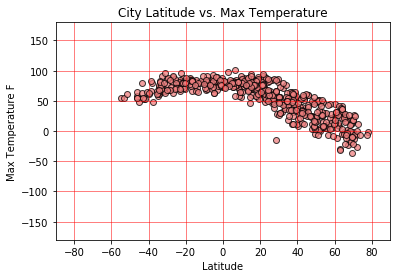

In [50]:
temp = world_weather["Max Temp"]
lat = world_weather["Lat"]
plt.scatter(lat, temp, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75)

#Limit the chart
plt.ylim(-180, 180)
plt.xlim(-90, 90)

# Incorporate the other graph properties
plt.grid(color='r', linestyle='-', linewidth=0.5)

# Create a legend
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature F")
plt.show()

In [47]:

# Save Figure
plt.savefig("City Latitude vs. Max Temperature.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Humidity Plot

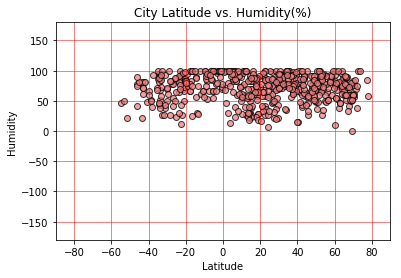

In [65]:
humidity = world_weather["Humidity"]
lat = world_weather["Lat"]
plt.scatter(lat, humidity, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75)

#Limit the chart
plt.ylim(-180, 180)
plt.xlim(-90, 90)

# Incorporate the other graph properties
plt.grid(color='r', linestyle='-', linewidth=0.5)

# Create a legend
plt.title("City Latitude vs. Humidity(%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

In [54]:
# Save Figure
plt.savefig("City Latitude vs. Humidty.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Cloudiness Plot

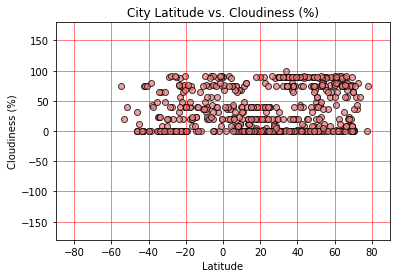

In [63]:
clouds = world_weather["Cloudiness"]
lat = world_weather["Lat"]
plt.scatter(lat, clouds, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75)

#Limit the chart
plt.ylim(-180, 180)
plt.xlim(-90, 90)

# Incorporate the other graph properties
plt.grid(color='r', linestyle='-', linewidth=0.5)

# Create a legend
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

In [66]:
# Save Figure
plt.savefig("City Latitude vs. Cloudiness.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Wind Speed Plot

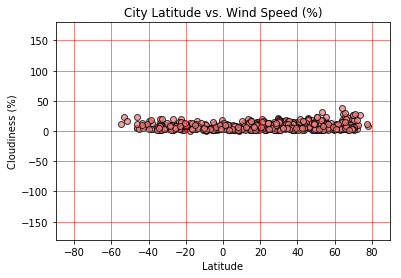

In [67]:
wind = world_weather["Wind Speed"]
lat = world_weather["Lat"]
plt.scatter(lat, wind, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75)

#Limit the chart
plt.ylim(-180, 180)
plt.xlim(-90, 90)

# Incorporate the other graph properties
plt.grid(color='r', linestyle='-', linewidth=0.5)

# Create a legend
plt.title("City Latitude vs. Wind Speed (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

In [68]:
# Save Figure
plt.savefig("City Latitude vs. Wind Speed.png")

<Figure size 432x288 with 0 Axes>